In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


Bad key "text.kerning_factor" on line 4 in
C:\Users\parit\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv(r"C:\Users\parit\OneDrive\Desktop\Indus_DS_PreWork_Data - raw.csv")

In [3]:
df.head()

,id,scholarshipAvailed,age,pincode,hasAdhar,literacy,hasEnrolledAdultLiteracy,eduType,eduInformal,statusFormalEdu,...,noGroup,wageRecievedCOVID,liveLostCOVID,disabledCOVID,illnessCOVID,injuryCOVID,movablePropLostCOVID,immovablePropLostCOVID,interestedCertProgram,vocationCategory
0,16-3-0-0-0-0-0-35-0-0,Not availed,28,700027.0,हाँ,Literate,NaN,Formal,NaN,Continuing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16-5-0-0-0-0-0-35-0-0,Not availed,28,700027.0,हाँ,Literate,NaN,Formal,NaN,Continuing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16-3-0-0-0-0-0-36-0-0,Not availed,28,700027.0,हाँ,Literate,NaN,Formal,NaN,Continuing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16-5-0-0-0-0-0-36-0-0,Not availed,28,700027.0,हाँ,Literate,NaN,Formal,NaN,Continuing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16-3-0-0-0-0-0-37-0-0,Not availed,28,700027.0,हाँ,Literate,NaN,Formal,NaN,Continuing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Get the datatypes of each columns number of records in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16000 non-null  object 
 1   scholarshipAvailed        57 non-null     object 
 2   age                       16000 non-null  int64  
 3   pincode                   15995 non-null  float64
 4   hasAdhar                  16000 non-null  object 
 5   literacy                  15998 non-null  object 
 6   hasEnrolledAdultLiteracy  5291 non-null   object 
 7   eduType                   10693 non-null  object 
 8   eduInformal               242 non-null    object 
 9   statusFormalEdu           10406 non-null  object 
 10  eduOther                  72 non-null     object 
 11  typeOfSchool              101 non-null    object 
 12  noScholarshipReason       23 non-null     object 
 13  eduTransport              55 non-null     object 
 14  isHead

In [5]:
df.columns

Index(['id', 'scholarshipAvailed', 'age', 'pincode', 'hasAdhar', 'literacy',
       'hasEnrolledAdultLiteracy', 'eduType', 'eduInformal', 'statusFormalEdu',
       'eduOther', 'typeOfSchool', 'noScholarshipReason', 'eduTransport',
       'isHeadOfFamily', 'genderHeadOfFamily', 'relWithHeadOfFamily', 'hasPDS',
       'hasSECC', 'hasAyushmanBharat', 'hasLand', 'reasonLandless',
       'hasHealthCert', 'employmentType', 'isWageEarner', 'isSHGMember',
       'isCooperativeMember', 'isFPOMember', 'noGroup', 'wageRecievedCOVID',
       'liveLostCOVID', 'disabledCOVID', 'illnessCOVID', 'injuryCOVID',
       'movablePropLostCOVID', 'immovablePropLostCOVID',
       'interestedCertProgram', 'vocationCategory'],
      dtype='object')

# Dropping irrevalent columns





Not all the columns are important to us in the given dataframe, and hence we would drop the columns that are irrevalent to us.

The list cols_to_drop contains the names of the cols that are irrevalent, drop all these cols from the dataframe

cols_to_drop = ['id','eduInformal','eduOther','vocationCategory','interestedCertProgram','immovablePropLostCOVID','movablePropLostCOVID','injuryCOVID','illnessCOVID','disabledCOVID','liveLostCOVID',
         'wageRecievedCOVID','noGroup','isFPOMember','isCooperativeMember','isSHGMember','isWageEarner','employmentType','reasonLandless','relWithHeadOfFamily','genderHeadOfFamily','eduTransport',
         'noScholarshipReason','typeOfSchool','eduOther','eduInformal','hasEnrolledAdultLiteracy]

In [6]:
# initialise cols_to_drop
df.drop(['id','eduInformal','eduOther','vocationCategory','interestedCertProgram','immovablePropLostCOVID','movablePropLostCOVID','injuryCOVID','illnessCOVID','disabledCOVID','liveLostCOVID',
         'wageRecievedCOVID','noGroup','isFPOMember','isCooperativeMember','isSHGMember','isWageEarner','employmentType','reasonLandless','relWithHeadOfFamily','genderHeadOfFamily','eduTransport',
         'noScholarshipReason','typeOfSchool','eduOther','eduInformal','hasEnrolledAdultLiteracy'], axis= 1, inplace = True)

In [7]:
df.head()

,scholarshipAvailed,age,pincode,hasAdhar,literacy,eduType,statusFormalEdu,isHeadOfFamily,hasPDS,hasSECC,hasAyushmanBharat,hasLand,hasHealthCert
0,Not availed,28,700027.0,हाँ,Literate,Formal,Continuing,Yes,नही,नही,नही,हाँ,नहीं
1,Not availed,28,700027.0,हाँ,Literate,Formal,Continuing,Yes,नही,नही,नही,हाँ,नहीं
2,Not availed,28,700027.0,हाँ,Literate,Formal,Continuing,Yes,नही,नही,नही,हाँ,नहीं
3,Not availed,28,700027.0,हाँ,Literate,Formal,Continuing,Yes,नही,नही,नही,हाँ,नहीं
4,Not availed,28,700027.0,हाँ,Literate,Formal,Continuing,Yes,नही,नही,नही,हाँ,नहीं


# Dropping the duplicate rows

In [8]:
df = df.drop_duplicates()
df.shape

(3650, 13)

# Dropping the null or missing values

In [9]:
df.isnull().sum()

scholarshipAvailed    3622
age                      0
pincode                  3
hasAdhar                 0
literacy                 2
eduType               1305
statusFormalEdu       1409
isHeadOfFamily          22
hasPDS                   0
hasSECC                400
hasAyushmanBharat        0
hasLand                  2
hasHealthCert            0
dtype: int64

In [10]:
# number of rows before removing duplicated rows
#print(len(df.index))
df[df.columns[0]].count()

28

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 0 to 15924
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   scholarshipAvailed  28 non-null     object 
 1   age                 3650 non-null   int64  
 2   pincode             3647 non-null   float64
 3   hasAdhar            3650 non-null   object 
 4   literacy            3648 non-null   object 
 5   eduType             2345 non-null   object 
 6   statusFormalEdu     2241 non-null   object 
 7   isHeadOfFamily      3628 non-null   object 
 8   hasPDS              3650 non-null   object 
 9   hasSECC             3250 non-null   object 
 10  hasAyushmanBharat   3650 non-null   object 
 11  hasLand             3648 non-null   object 
 12  hasHealthCert       3650 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 399.2+ KB


In [12]:
# Count Number of rows after deleting duplicated rows
df[df.columns[0]].count()

28

In [13]:
df.loc[:, df.dtypes == object] = df.loc[:, df.dtypes == object].fillna('')
df

,scholarshipAvailed,age,pincode,hasAdhar,literacy,eduType,statusFormalEdu,isHeadOfFamily,hasPDS,hasSECC,hasAyushmanBharat,hasLand,hasHealthCert
0,Not availed,28,700027.0,हाँ,Literate,Formal,Continuing,Yes,नही,नही,नही,हाँ,नहीं
7,,1,700027.0,नही,Illiterate,,,Yes,नही,नही,नही,नहीं,नहीं
8,,30,490024.0,हाँ,Literate,Formal,Finished Education,Yes,नही,नही,नही,नहीं,नहीं
9,,30,490024.0,हाँ,Literate,Formal,Finished Education,Yes,नही,नही,नही,हाँ,नहीं
11,,41,494670.0,नही,Illiterate,,,No,नही,नही,नही,हाँ,नहीं
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15768,,80,491441.0,हाँ,शिक्षित,औपचारिक,शिक्षा पूर्ण,हाँ,हाँ,नही,नही,हाँ,नहीं
15786,,41,491441.0,हाँ,शिक्षित,औपचारिक,शिक्षा पूर्ण,हाँ,हाँ,नही,नंबर नहीं पता,हाँ,नहीं
15856,,47,491441.0,हाँ,शिक्षित,अनौपचारिक,,हाँ,हाँ,नही,नही,हाँ,नहीं
15896,,56,491441.0,हाँ,शिक्षित,औपचारिक,शिक्षा पूर्ण,हाँ,हाँ,नही,नही,नहीं,नहीं


In [14]:
# check for total nan values in each columns
df.describe()

,age,pincode
count,3650.000000,3647.000000
mean,36.143014,492766.695640
std,21.691321,38442.843088
min,-965.000000,1222.000000
25%,26.000000,491441.000000
50%,33.000000,494334.000000
75%,45.000000,495677.000000
max,106.000000,979889.000000


# Removing outliers

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

Detecting outliers
There many techiniques to detect outliers. Let us first see the simplest form of visualizing outliers.

Box plots are a graphical depiction of numerical data through their quantiles. It is a very simple but effective way to visualize outliers. Think about the lower and upper whiskers as the boundaries of the data distribution. Any data points that show above or below the whiskers, can be considered outliers or anomalous.

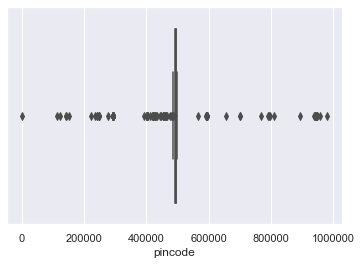

In [15]:
## Plot a boxplot for 'Price' column in dataset. 
sns.boxplot(x=df["pincode"])

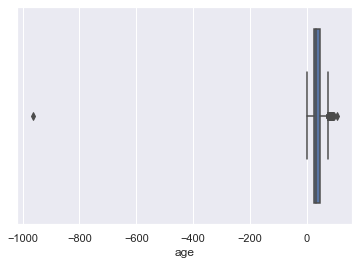

In [16]:
## PLot a boxplot for 'HP' columns in dataset
sns.boxplot(x=df["age"])

In [17]:
df.shape

(3650, 13)

print all the columns which are of int or float datatype in df.

In [18]:
#code here
df_cat=df[df.columns[np.where(df.dtypes=='object')]]
df

,scholarshipAvailed,age,pincode,hasAdhar,literacy,eduType,statusFormalEdu,isHeadOfFamily,hasPDS,hasSECC,hasAyushmanBharat,hasLand,hasHealthCert
0,Not availed,28,700027.0,हाँ,Literate,Formal,Continuing,Yes,नही,नही,नही,हाँ,नहीं
7,,1,700027.0,नही,Illiterate,,,Yes,नही,नही,नही,नहीं,नहीं
8,,30,490024.0,हाँ,Literate,Formal,Finished Education,Yes,नही,नही,नही,नहीं,नहीं
9,,30,490024.0,हाँ,Literate,Formal,Finished Education,Yes,नही,नही,नही,हाँ,नहीं
11,,41,494670.0,नही,Illiterate,,,No,नही,नही,नही,हाँ,नहीं
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15768,,80,491441.0,हाँ,शिक्षित,औपचारिक,शिक्षा पूर्ण,हाँ,हाँ,नही,नही,हाँ,नहीं
15786,,41,491441.0,हाँ,शिक्षित,औपचारिक,शिक्षा पूर्ण,हाँ,हाँ,नही,नंबर नहीं पता,हाँ,नहीं
15856,,47,491441.0,हाँ,शिक्षित,अनौपचारिक,,हाँ,हाँ,नही,नही,हाँ,नहीं
15896,,56,491441.0,हाँ,शिक्षित,औपचारिक,शिक्षा पूर्ण,हाँ,हाँ,नही,नही,नहीं,नहीं


In [19]:
#code here
df.describe()

,age,pincode
count,3650.000000,3647.000000
mean,36.143014,492766.695640
std,21.691321,38442.843088
min,-965.000000,1222.000000
25%,26.000000,491441.000000
50%,33.000000,494334.000000
75%,45.000000,495677.000000
max,106.000000,979889.000000


In [20]:
l = list(df.loc[:,df.dtypes != object].columns)

# Outliers removal techniques

Using IQR Technique

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
Q1,Q3

(age            26.0
 pincode    491441.0
 Name: 0.25, dtype: float64,
 age            45.0
 pincode    495677.0
 Name: 0.75, dtype: float64)

In [22]:
IQR = Q3-Q1
IQR

age          19.0
pincode    4236.0
dtype: float64

In [23]:
lower_limit = Q1 -1.5*IQR
upper_limit = Q3 - 1.5*IQR
lower_limit, upper_limit

(age            -2.5
 pincode    485087.0
 dtype: float64,
 age            16.5
 pincode    489323.0
 dtype: float64)

In [24]:
df2 = df[(df<lower_limit)| (df>upper_limit)]

# Outlier removal using Z-score function

We will use Z-score function defined in scipy library to detect the outliers in dataframe df having columns which are in variable 'l'

In [25]:
# calculate absolute zscore values for each columns present in l, save it in variable z. Print z
z= np.abs(stats.zscore(df[l]))
print (z)          

[[0.37545568        nan]
 [1.62036372        nan]
 [0.28324027        nan]
 ...
 [0.50059072        nan]
 [0.91556007        nan]
 [1.42274483        nan]]


In [26]:
# print the values in dataframe which are less than the threshold and save this dataframe as df3
threshold = 3
df3 = df[(z < threshold).all(axis=1)]
df3

,scholarshipAvailed,age,pincode,hasAdhar,literacy,eduType,statusFormalEdu,isHeadOfFamily,hasPDS,hasSECC,hasAyushmanBharat,hasLand,hasHealthCert


In [27]:
#print (df.shape)
#print (df2.shape)
#print (df3.shape)

In [28]:
df_cat=df[df.columns[np.where(df.dtypes=='object')]]

In [29]:
#Replicate the below output

for i in df.columns:
    print ("-------------%s---------"%i)
    print (df[i].value_counts())

-------------scholarshipAvailed---------
               3622
हाँ              14
नही              11
Not availed       2
नहीं              1
Name: scholarshipAvailed, dtype: int64
-------------age---------
 22     139
 25     134
 31     130
 24     129
 32     128
       ... 
 88       1
 14       1
 12       1
 8        1
-965      1
Name: age, Length: 91, dtype: int64
-------------pincode---------
491441.0    584
496450.0    162
496001.0    144
494449.0    113
497225.0     96
           ... 
429007.0      1
595224.0      1
497559.0      1
498115.0      1
292014.0      1
Name: pincode, Length: 319, dtype: int64
-------------hasAdhar---------
हाँ    3526
नही     124
Name: hasAdhar, dtype: int64
-------------literacy---------
शिक्षित       2310
अशिक्षित      1291
Literate        38
Illiterate       9
                 2
Name: literacy, dtype: int64
-------------eduType---------
औपचारिक      2209
             1305
अनौपचारिक      95
Formal         33
#NAME?          5
Informal        3
Na

In [30]:
df['scholarshipAvailed'].value_counts()

               3622
हाँ              14
नही              11
Not availed       2
नहीं              1
Name: scholarshipAvailed, dtype: int64

In [31]:
df_cat=df_cat.replace({'scholarshipAvailed':{'हाँ':'availed','नही':'Not availed','नहीं':'Not availed'},
            'hasAdhar':{'हाँ':'Yes','नही':'No'},
            'literacy':{'शिक्षित':'Literate','अशिक्षित':'Illiterate'},
            'eduType':{'औपचारिक':'Formal','अनौपचारिक':'Informal','#NAME?':'Informal'},
            'statusFormalEdu':{'शिक्षा पूर्ण':'Finished Education','जारी है':'Continuing','--- चुनिए ---':'Continuing'},
            'isHeadOfFamily':{'हाँ':'Yes','नही':'No','नहीं':'No'},
            'hasPDS':{'हाँ':'Yes','नही':'No','नहीं':'No'},
            'hasSECC':{'नही':'No','नंबर नहीं पता':'Unknown Number','नहीं':'No','हाँ':'Yes'},
            'hasAyushmanBharat':{'नही':'No','नंबर नहीं पता':'Unknown','नहीं':'No','हाँ':'Yes'},
            'hasLand':{'नहीं':'No','हाँ':'Yes'},
            'hasHealthCert':{'नहीं':'No','हाँ':'Yes','नहीं/नंबर':'Unknown'}})

In [32]:
for x in df_cat.columns:
    print("%s "%x)
    print(df_cat[x].value_counts())

scholarshipAvailed 
               3622
availed          14
Not availed      14
Name: scholarshipAvailed, dtype: int64
hasAdhar 
Yes    3526
No      124
Name: hasAdhar, dtype: int64
literacy 
Literate      2348
Illiterate    1300
                 2
Name: literacy, dtype: int64
eduType 
Formal      2242
            1305
Informal     103
Name: eduType, dtype: int64
statusFormalEdu 
Finished Education    2149
                      1409
Continuing              88
Dropout                  4
Name: statusFormalEdu, dtype: int64
isHeadOfFamily 
Yes    2888
No      740
         22
Name: isHeadOfFamily, dtype: int64
hasPDS 
Yes    2148
No     1502
Name: hasPDS, dtype: int64
hasSECC 
No                2978
                   400
Unknown Number     266
Yes                  6
Name: hasSECC, dtype: int64
hasAyushmanBharat 
No         2835
Unknown     562
Yes         253
Name: hasAyushmanBharat, dtype: int64
hasLand 
No     2509
Yes    1139
          2
Name: hasLand, dtype: int64
hasHealthCert 
No   

In [33]:
df['pincode'].value_counts()

491441.0    584
496450.0    162
496001.0    144
494449.0    113
497225.0     96
           ... 
429007.0      1
595224.0      1
497559.0      1
498115.0      1
292014.0      1
Name: pincode, Length: 319, dtype: int64

In [34]:
df_cat['age']=df['age']
df_cat['pincode']=df['pincode']
df_cat

,scholarshipAvailed,hasAdhar,literacy,eduType,statusFormalEdu,isHeadOfFamily,hasPDS,hasSECC,hasAyushmanBharat,hasLand,hasHealthCert,age,pincode
0,Not availed,Yes,Literate,Formal,Continuing,Yes,No,No,No,Yes,No,28,700027.0
7,,No,Illiterate,,,Yes,No,No,No,No,No,1,700027.0
8,,Yes,Literate,Formal,Finished Education,Yes,No,No,No,No,No,30,490024.0
9,,Yes,Literate,Formal,Finished Education,Yes,No,No,No,Yes,No,30,490024.0
11,,No,Illiterate,,,No,No,No,No,Yes,No,41,494670.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15768,,Yes,Literate,Formal,Finished Education,Yes,Yes,No,No,Yes,No,80,491441.0
15786,,Yes,Literate,Formal,Finished Education,Yes,Yes,No,Unknown,Yes,No,41,491441.0
15856,,Yes,Literate,Informal,,Yes,Yes,No,No,Yes,No,47,491441.0
15896,,Yes,Literate,Formal,Finished Education,Yes,Yes,No,No,No,No,56,491441.0


In [35]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [36]:
cols_with_missing_values=[['literacy','eduType','statusFormalEdu','isHeadOfFamily','hasSECC','hasLand']]

In [37]:
for col in cols_with_missing_values:
                df_cat[col] = imputer.fit_transform(df_cat[col])

In [38]:
df_cat['scholarshipAvailed'].fillna('Not availed',inplace=True)

In [39]:
df_cat['pincode'].fillna(491441.0,inplace=True)

In [40]:
df_cat['pincode']=df_cat['pincode'].astype(int)

In [41]:
df_cat.isnull().sum()

scholarshipAvailed    0
hasAdhar              0
literacy              0
eduType               0
statusFormalEdu       0
isHeadOfFamily        0
hasPDS                0
hasSECC               0
hasAyushmanBharat     0
hasLand               0
hasHealthCert         0
age                   0
pincode               0
dtype: int64

In [42]:
df_cat["scholarshipAvailed"] = df_cat["scholarshipAvailed"].map({'availed': 1, 'Not availed': 2})
for column in df_cat.drop(['scholarshipAvailed','age','pincode'],axis=1).columns:
    df_cat = pd.get_dummies(df_cat, columns=[column],drop_first=True)

In [43]:
df_cat

,scholarshipAvailed,age,pincode,hasAdhar_Yes,literacy_Illiterate,literacy_Literate,eduType_Formal,eduType_Informal,statusFormalEdu_Continuing,statusFormalEdu_Dropout,...,hasPDS_Yes,hasSECC_No,hasSECC_Unknown Number,hasSECC_Yes,hasAyushmanBharat_Unknown,hasAyushmanBharat_Yes,hasLand_No,hasLand_Yes,hasHealthCert_Unknown,hasHealthCert_Yes
0,2.0,28,700027,1,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
7,NaN,1,700027,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8,NaN,30,490024,1,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
9,NaN,30,490024,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
11,NaN,41,494670,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15768,NaN,80,491441,1,0,1,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
15786,NaN,41,491441,1,0,1,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0
15856,NaN,47,491441,1,0,1,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
15896,NaN,56,491441,1,0,1,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0


In [44]:
df_new=pd.read_csv(r"C:\Users\parit\OneDrive\Desktop\Indus_DS_PreWork_Data - raw.csv")

In [45]:
columnNameList=['id','eduInformal','eduOther','vocationCategory','interestedCertProgram','immovablePropLostCOVID','movablePropLostCOVID','injuryCOVID','illnessCOVID','disabledCOVID','liveLostCOVID',
         'wageRecievedCOVID','noGroup','isFPOMember','isCooperativeMember','isSHGMember','isWageEarner','employmentType','reasonLandless','relWithHeadOfFamily','genderHeadOfFamily','eduTransport',
         'noScholarshipReason','typeOfSchool','eduOther','eduInformal','hasEnrolledAdultLiteracy']
df_new.drop(columnNameList,axis=1,inplace=True)

In [46]:
df_new=df.replace({'scholarshipAvailed':{'हाँ':'availed','नही':'Not availed','नहीं':'Not availed'},
            'hasAdhar':{'हाँ':'Yes','नही':'No'},
            'literacy':{'शिक्षित':'Literate','अशिक्षित':'Illiterate'},
            'eduType':{'औपचारिक':'Formal','अनौपचारिक':'Informal','#NAME?':'Informal'},
            'statusFormalEdu':{'शिक्षा पूर्ण':'Finished Education','जारी है':'Continuing','--- चुनिए ---':'Continuing'},
            'isHeadOfFamily':{'हाँ':'Yes','नही':'No','नहीं':'No'},
            'hasPDS':{'हाँ':'Yes','नही':'No','नहीं':'No'},
            'hasSECC':{'नही':'No','नंबर नहीं पता':'Unknown Number','नहीं':'No','हाँ':'Yes'},
            'hasAyushmanBharat':{'नही':'No','नंबर नहीं पता':'Unknown','नहीं':'No','हाँ':'Yes'},
            'hasLand':{'नहीं':'No','हाँ':'Yes'},
            'hasHealthCert':{'नहीं':'No','हाँ':'Yes','नहीं/नंबर':'Unknown'}})

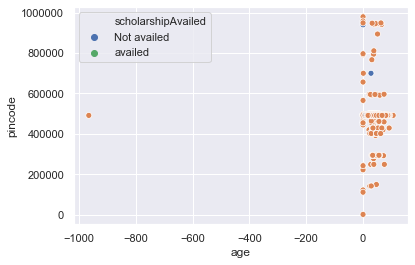

In [47]:
sns.scatterplot(data=df_new, x="age", y="pincode",hue='scholarshipAvailed')

In [48]:
l=df_new.loc[df_new['age']<0]

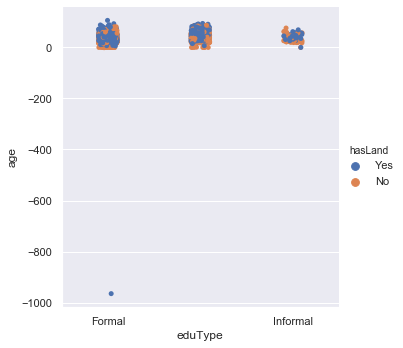

In [49]:
sns.catplot(x="eduType",y='age', kind="strip", hue='hasLand',data=df_new)

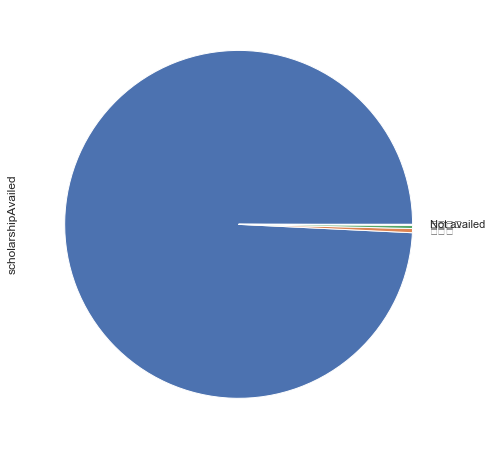

In [50]:
# Plot a pie chart to visualise unique value counts in column 'scholarshipAvailed' using matplotlib

plt.figure(figsize= (8,8))
vc= df["scholarshipAvailed"].value_counts()
vc.plot(kind='pie')
plt.show()

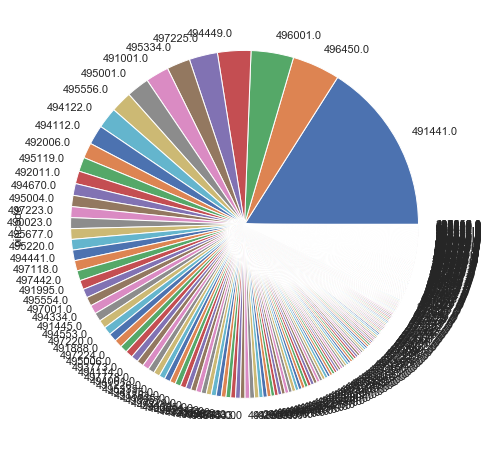

In [51]:
# Plot a pie chart to visualise unique value counts in column 'pincode' using matplotlib

plt.figure(figsize= (8,8))
vc= df["pincode"].value_counts()
vc.plot(kind='pie')
plt.show()

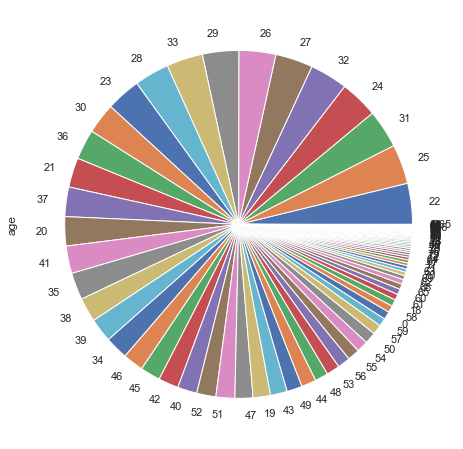

In [52]:
# Plot a pie chart to visualise unique value counts in column 'pincode' using matplotlib

plt.figure(figsize= (8,8))
vc= df["age"].value_counts()
vc.plot(kind='pie')
plt.show()

# Visualising Univariate Distributions

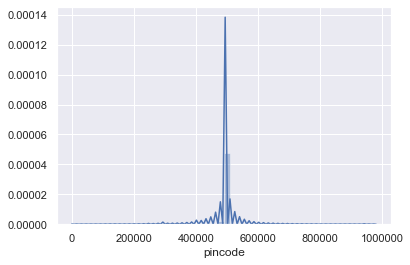

In [53]:
#ploting distplot for variable pincode
sns.distplot(df["pincode"])
plt.show()

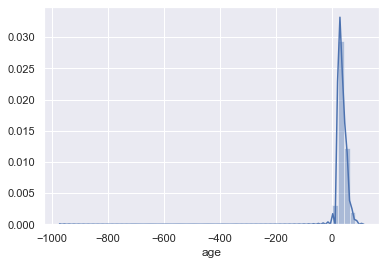

In [54]:
#ploting distplot for variable age
sns.distplot(df["age"])
plt.show()

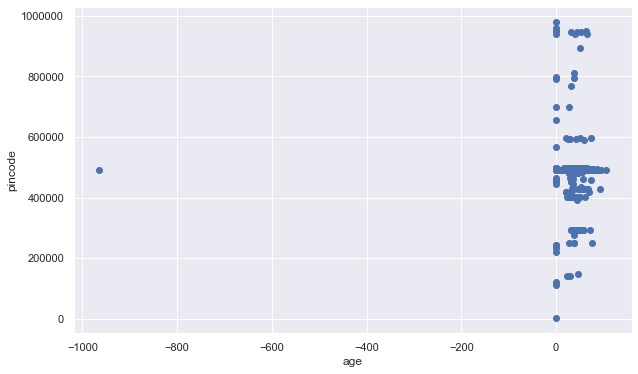

In [56]:
## Your code here - 
fig, ax= plt.subplots(figsize=(10,6))
ax.scatter(df['age'], df["pincode"])
ax.set_xlabel('age')
ax.set_ylabel("pincode")
plt.show()

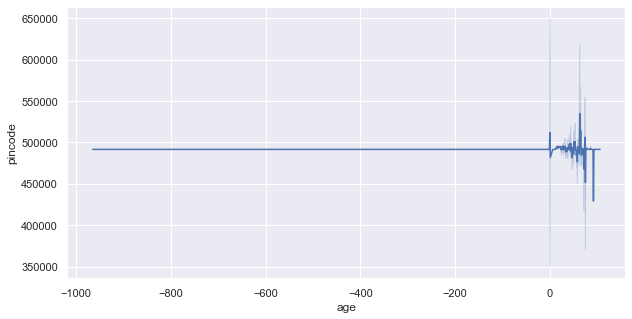

In [57]:
plt.figure(figsize=(10,5))
sns.lineplot(x = "age", y= "pincode", data= df)
plt.show()

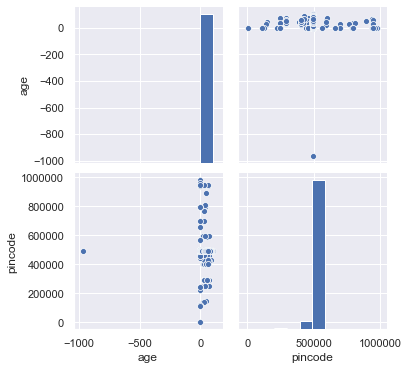

In [58]:
sns.pairplot(df)
plt.show()

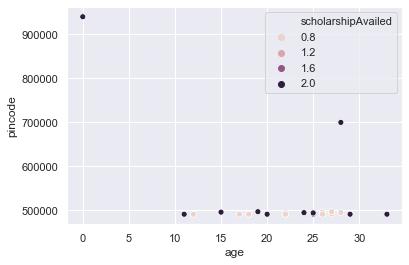

In [59]:
sns.scatterplot(data=df_cat, x="age", y="pincode",hue='scholarshipAvailed')

In [60]:
l=df_new.loc[df_new['age']<0]

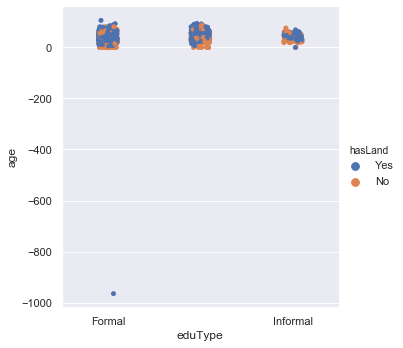

In [61]:
sns.catplot(x="eduType",y='age', kind="strip", hue='hasLand',data=df_new)

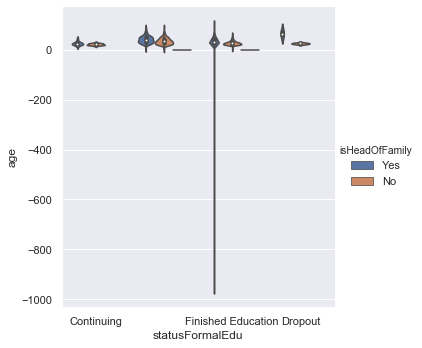

In [62]:
sns.catplot(y="age", x="statusFormalEdu", hue='isHeadOfFamily', kind="violin", data=df_new)

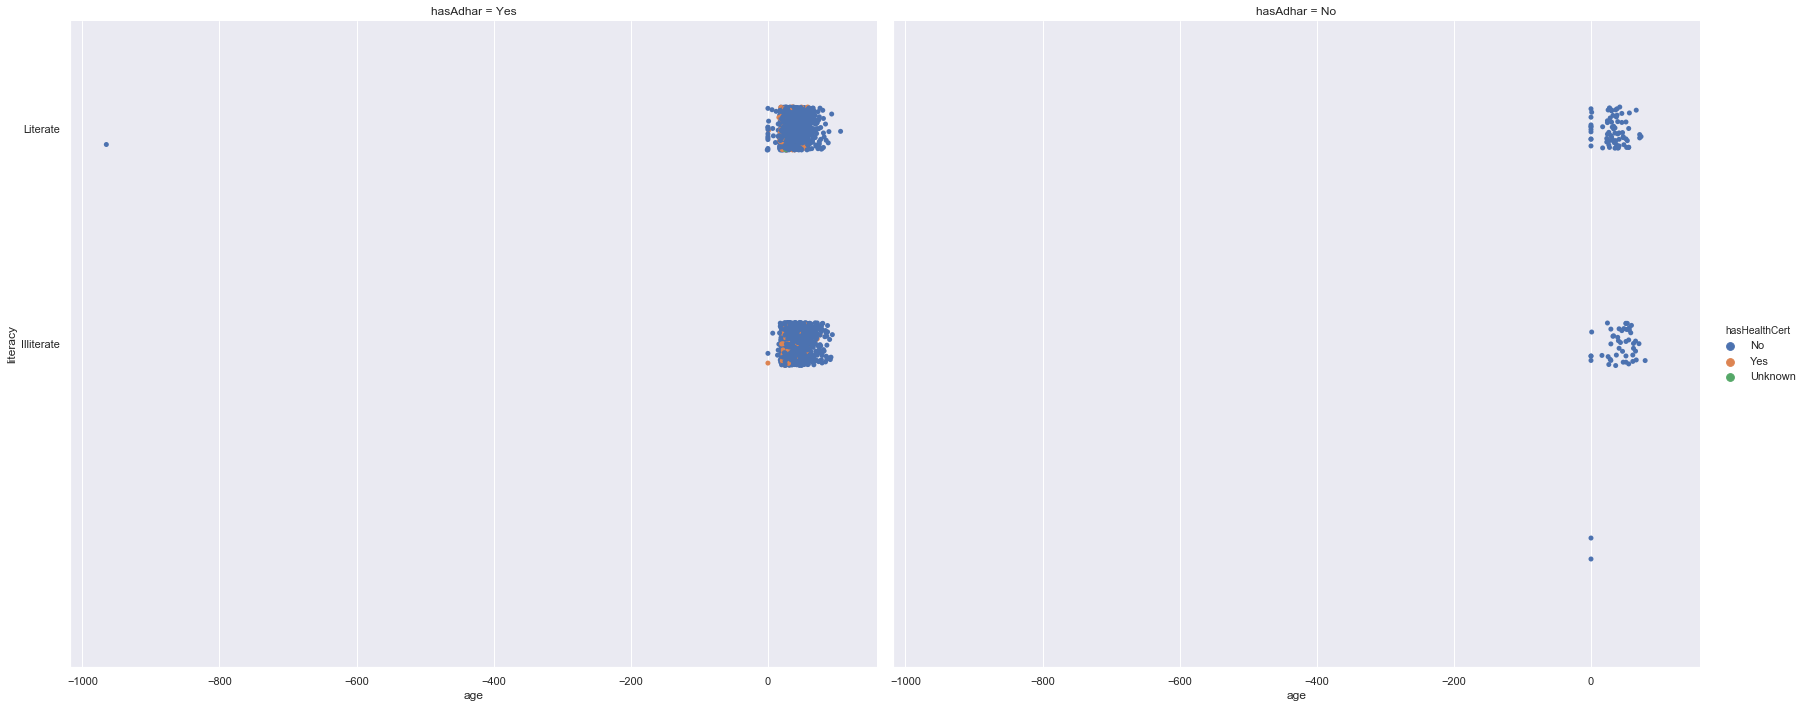

In [63]:
sns.catplot(x="age", y="literacy", col="hasAdhar",
                hue="hasHealthCert", data=df_new,
                height=10, aspect=1.2)

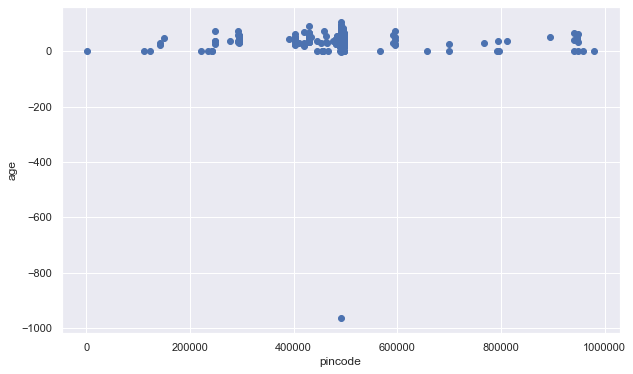

In [64]:
## Your code here - 
fig, ax= plt.subplots(figsize=(10,6))
ax.scatter(df['pincode'], df["age"])
ax.set_xlabel('pincode')
ax.set_ylabel("age")
plt.show()

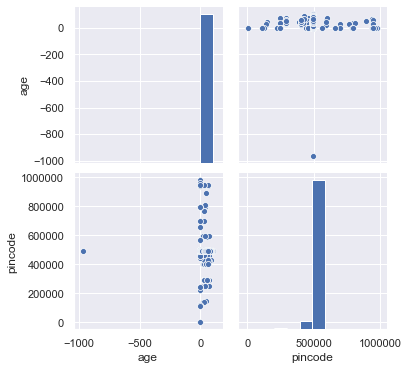

In [65]:
sns.pairplot(df_new)
plt.show()

In [67]:
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(df_new)